# Problem set 1: Printing and plotting

**Table of contents**<a id='toc0_'></a>    
- 1. [define function](#toc1_)    
- 2. [print to screen (table)](#toc2_)    
- 3. [write the output to `table_output.txt`](#toc3_)    
- 4. [read `table_output.txt` and print content to screen](#toc4_)    
- 5. [2d plot indifference curves](#toc5_)    
- 6. [3d plots](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

Imports you will need:

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D # for 3D plots
from matplotlib import cm # for colormap

# predefine options for all plots
plt.rcParams.update({'axes.grid':True,'grid.color':'black','grid.alpha':'0.25','grid.linestyle':'-'})
plt.rcParams.update({'font.size': 14})

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

**Note:** Answers are in A*.py files.

## 1. <a id='toc1_'></a>[define function](#toc0_)

Implement a Python version of this function:

$$ 
u(x_1,x_2) = (\alpha x_1^{-\beta} + (1-\alpha) x_2^{-\beta})^{-1/\beta} 
$$

where `x1` and `x2` are *positional arguments*, and `alpha`and `beta` are *keyword arguments* with default arguments $\alpha=0.5$ and $\beta=1$.

In [ ]:

# Utility function. A function can be defined in many ways. 
# I like to keep the return statement on a separate line, so I can easily see what is returned.

def u_func(x1, x2, alpha=0.5, beta=1):
    u = (alpha*x1**(-beta)+(1-alpha)*x2**(-beta))**(-1/beta)
    return u

# But is also possible to just write as a one-liner:
# def u_func(x1, x2, alpha=0.5, beta=1):
#     return (alpha*x1**(-beta)+(1-alpha)*x2**(-beta))**(-1/beta)
# Both will yield the same result.

# We have now 'hardcoded' the parameters alpha and beta, so you don't have to specify them when calling the function.
# But you can always override them by specifying them when calling the function, e.g. u_func(1,2,alpha=0.3,beta=2)

## 2. <a id='toc2_'></a>[print to screen (table)](#toc0_)

In [65]:
# We are given a list of x1 and x2 values. These are marked by the simple [] brackets. 
# A list is easily changed, you can add or remove elements.
# A list can contain elements of different types, e.g. integers and strings.
# A list can be changed after it has been created( It is muteable)
x1_vec = [1.05,1.3,2.3,2.5,3.1]
x2_vec = [1.05,1.3,2.3,2.5,3.1]

# For example, we can change the first element:
# x1_vec[0] = 1.1  # Change the first element
# print(x1_vec)  # Output: [1.1, 1.3, 2.3, 2.5, 3.1]
# or 
# x1_vec.append(3.5)  # Add 3.5 to the end
# print(x1_vec)  # Output: [1.05, 1.3, 2.3, 2.5, 3.1, 3.5]
# or
# x1_vec.remove(2.3)  # Remove the value 2.3
# print(x1_vec)  # Output: [1.05, 1.3   , 2.5, 3.1]
# There are many more operations you can do on lists

In [69]:
pi = 3.1415926535 
print(f"Pi rounded to 2 decimals: {pi:.2f}")

Pi rounded to 2 decimals: 3.14


Construct a Python function `gen_table(x1_vec,x2_vec,u_func)` to print values of `u(x1,x2)` in the table form shown below.

In [ ]:
# Now we want to create a table of utility values for each combination of x1 and x2 values.
# We will create a function that generates a text table.

def gen_table(x1_vec,x2_vec,u_func):
    
    # a. empty text
    text = '' # We will add to this text step by step
    
    # b. top header
    text += f'{"":3s}' # The += operator adds to the existing text. Here we add 3 spaces for the top left corner
    for j, x2 in enumerate(x2_vec): # enumerate gives both the index and the value - the value j is interchangeable with any other name
       text += f'{j:6d}' # Take the value j and format it as an integer with 6 spaces
    text += '\n' # line shift 
    
    # c. body
    for i,x1 in enumerate(x1_vec): 
        if i > 0: # Makes sure we do not add a line shift before the first line. I.e only add line shift if i>0, so from the second line and onwards
            text += '\n' # line shift 
        text += f'{i:3d} ' # left header 
        for j, x2 in enumerate(x2_vec):
            text += f'{u_func(x1,x2):6.3f}'# We can change the amount of decimal places by changing the number after the : in the f-string
    
    return text

# Now we can generate the table
table = gen_table(x1_vec,x2_vec, u_func)
print(table) # Print the table

        0     1     2     3     4
  0  1.050 1.162 1.442 1.479 1.569
  1  1.162 1.300 1.661 1.711 1.832
  2  1.442 1.661 2.300 2.396 2.641
  3  1.479 1.711 2.396 2.500 2.768
  4  1.569 1.832 2.641 2.768 3.100


In [ ]:
from A1 import u_func as u_func_answer
from A2 import gen_table as gen_table_answer
print(gen_table_answer(x1_vec,x2_vec,u_func_answer))

# Your ansawers should match the answers provided in A1.py and A2.py

        0     1     2     3     4
  0  1.050 1.162 1.442 1.479 1.569
  1  1.162 1.300 1.661 1.711 1.832
  2  1.442 1.661 2.300 2.396 2.641
  3  1.479 1.711 2.396 2.500 2.768
  4  1.569 1.832 2.641 2.768 3.100


## 3. <a id='toc3_'></a>[write the output to `table_output.txt`](#toc0_)

In [ ]:
# This will save the table to a text file

with open('table_output.txt', 'w') as f: # 'w' means we write to the file, 'r' would mean we read from the file
    f.write(gen_table(x1_vec,x2_vec,u_func)) # Write the table, you've just written, to the file. 
#The file will be stored in the same folder as this notebook and called 'table_output.txt'

## 4. <a id='toc4_'></a>[read `table_output.txt` and print content to screen](#toc0_)

In [ ]:
# To read the file and print its contents, you can use the following code:

with open('table_output.txt', 'r') as f: # 'r' means we read from the file 
    table_output = f.read() # Read the contents of the file
    print(table_output)

# There is a multitude of ways to read and write files. This is just one simple example. More will come in future exercises.

        0     1     2     3     4
  0   1.05  1.16  1.44  1.48  1.57
  1   1.16  1.30  1.66  1.71  1.83
  2   1.44  1.66  2.30  2.40  2.64
  3   1.48  1.71  2.40  2.50  2.77
  4   1.57  1.83  2.64  2.77  3.10


## 5. <a id='toc5_'></a>[2d plot indifference curves](#toc0_)

The formula for the indifference curves of $u(x_1,x_2)$ is:

$$
x_2(x_1, u) = \left( \frac{u^{-\beta} - \alpha x_1^{-\beta}}{1-\alpha} \right)^{-1/\beta}
$$

for 

$$
\log(x_1) > \log(u) + \log(\alpha)/\beta
$$

Produce a figure like the one below and save to disc.

In [ ]:
# these values were used
alpha = 0.5 
betas = [0.25, 1.0, 4.0]
uvals = [1.5, 2.0, 2.5] # values of u

# write your code here

def x2_func(x1,u,alpha=0.5,beta=0.5):
    x_2 = ((u**(-beta)-alpha*x1**(-beta))/(1-alpha))**(-1/beta)
    return x_2

def plot(alpha,betas,uvals):

    x1_vec = np.linspace(0.10,4.0,1000) # x1 values for plotting. Goes from 0.1 to 4.0 with 1000 points in between

    fig = plt.figure() # This starts a new figure
    ax = fig.add_subplot(1,1,1) # This adds a single subplot to the figure. It is a 1x1 grid, and we are adding the first subplot

    # main
    ls = ['-','--',':'] # Different line styles for different betas
    for i,beta in enumerate(betas): # We want to plot for different betas
        for j,uval in enumerate(uvals): # And we want to plot for different u values
            
            I = np.log(x1_vec) > np.log(uval) + np.log(alpha)/beta # Our constraint. This is a boolean array that is True where the condition is met and False otherwise
            x2_vec = x2_func(x1_vec[I],uval,beta=beta) # The I inside the brackets selects only the values of x1_vec that give real x2 values. I.e the condition has to be true
            
            if i == 0: # Double == means 'is equal to'
                label = fr'$u = {uval}$, $\beta = {beta}$' # The fr'' means we can use LaTeX inside the string and also use variables inside the string.
            elif j == 0: 
                label = fr'$\beta = {beta}$' 
            else:
                label = ''

            ax.plot(x1_vec[I],x2_vec,ls=ls[i],color=colors[j],label=label) # The ls argument sets the line style for the i-th beta value

    # add 45 degree line
    ax.plot([0,4],[0,4],color='grey',zorder=0) 

    # labels
    ax.set_title('Indifference Curves',pad=10) # pad adds space between title and plot
    ax.set_xlabel('$x_1$') # Gives the x-axis a label
    ax.set_ylabel('$x_2$') # Gives the y-axis a label

    # lims
    ax.set_ylim(-0.1,4) # Sets the limits of the y-axis. It now goes from -0.1 to 4
    ax.set_xlim(-0.1,4) # Sets the limits of the x-axis. It now goes from -0.1 to 4

    # legend
    ax.legend(ncol=2,loc='lower left',prop={'size': 10}) # ncol sets the number of columns in the legend, loc sets the location, prop sets the font size. Try changing these values to see what happens!

    # save
    fig.savefig('A5_indifference_curves.png') # Saves the figure to a file. The file will be in the same folder as this notebook

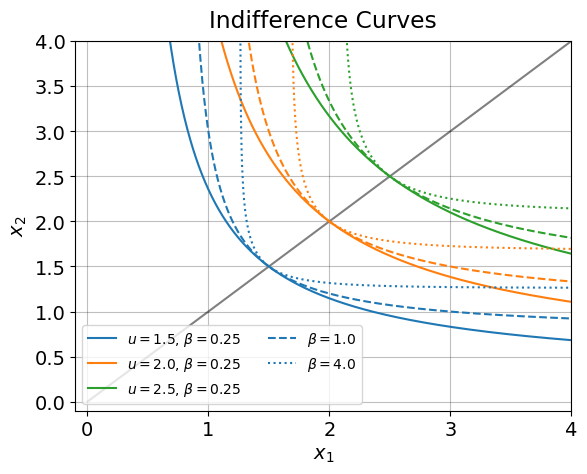

In [ ]:
# We call the function to make the plot
plot(alpha,betas,uvals)

**Hint:** To check your implementation of `x2(x1,u,alpha,beta)` you can use the code below.

In [28]:
x1_ = 2.0
x2_ = 1.5
u_ = u_func(x1_,x2_,alpha=alpha,beta=betas[0])
x2_implied = x2_func(x1_,u_,alpha=alpha,beta=betas[0])
assert np.isclose(x2_,x2_implied)

## 6. <a id='toc6_'></a>[3d plot of utility function](#toc0_)

Reproduce the figures below of $u(x_1,x_2)$ using:

1. the `meshgrid` function from *numpy* 
1. the `.plot_countour`, `.plot_surface` and `.plot` axis methods from *matplotlib*.

where the black lines are indifference curves for $u \in \{1,2,3\}$.

**Hint:** You can look at the documentation.

In [35]:
# If you want to see the documentation for a function, you can use the ? operator in a code cell
# This will print the documentation for the np.meshgrid function. Remember to run the cell to see the output
?np.meshgrid

Signature:       np.meshgrid(*xi, copy=True, sparse=False, indexing='xy')
Call signature:  np.meshgrid(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function meshgrid at 0x107b0b9c0>
File:            /opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py
Docstring:      
Return a list of coordinate matrices from coordinate vectors.

Make N-D coordinate arrays for vectorized evaluations of
N-D scalar/vector fields over N-D grids, given
one-dimensional coordinate arrays x1, x2,..., xn.

.. versionchanged:: 1.9
   1-D and 0-D cases are allowed.

Parameters
----------
x1, x2,..., xn : array_like
    1-D arrays representing the coordinates of a grid.
indexing : {'xy', 'ij'}, optional
    Cartesian ('xy', default) or matrix ('ij') indexing of output.
    See Notes for more details.

    .. versionadded:: 1.7.0
sparse : bool, optional
    If True the shape of the returned coordinate array for dimension *i*
    is reduced from ``(N1, ..., Ni, ... 

In [ ]:
# these values were used

alpha = 0.75
beta = 0.5
x1_vec = np.linspace(0.1,4,1000) # x1 values for plotting. Goes from 0.1 to 4.0 with 1000 points in between
x2_vec = np.linspace(0.1,4,1000) # x2 values for plotting. Goes from 0.1 to 4.0 with 1000 points in between
uvals = [1.0,2.0,3.0]

def plot(x1_vec,x2_vec,alpha,beta,uvals):

    # a. calculate
    x1_grid,x2_grid = np.meshgrid(x1_vec,x2_vec,indexing='ij')
    u_grid = u_func(x1_grid,x2_grid,alpha=alpha,beta=beta) # 
    fig = plt.figure() # This starts a new figure
    ax = fig.add_subplot(1,1,1,projection='3d') # Here we add the argument projection='3d' to make a 3D plot

    # i. main
    h = ax.plot_surface(x1_grid,x2_grid,u_grid,cmap=cm.plasma,alpha=0.75) # viridis, jet, plasma, inferno, magma, cividis. Multiple colourschemes available. See https://matplotlib.org/stable/tutorials/colors/colormaps.html
    # The alpha argument sets the transparency of the surface. 0 is fully transparent, 1 is fully opaque
    fig.colorbar(h) # This adds a colourbar to the side of the plot. The colours are taken from the colormap specified in the plot_surface function

    # ii. indifference curves
    for uval in uvals:

        I = np.log(x1_vec) > np.log(uval) + np.log(alpha)/beta # We remember our constraint from before
        x1_vec_ = x1_vec[I] # Select only the x1 values which hold for the constraint
        x2_vec_ = x2_func(x1_vec_,uval,alpha=alpha,beta=beta) # Uses the function we defined above

        J = x2_vec_ < x2_vec[-1] # We only plot for x2 values that are within the range of our original x2_vec
        uval_vec_ = uval*np.ones_like(x2_vec_[J]) # We create a vector of the same size as x2_vec_[J] with the value uval
        ax.plot(x1_vec_[J],x2_vec_[J],uval_vec_,lw=2,color='black',zorder=99) 

    # c. add labels
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

    # c. invert xaxis to bring origin in center front
    ax.invert_xaxis() 
    fig.tight_layout(pad=0.1)
    
    # As the matplotlib package already plots for us, we do not need to return anything from this function
    # The matplotlib package is huge and can do many things. We have only scratched the surface here. If more interest, see https://matplotlib.org/stable/tutorials/index.html

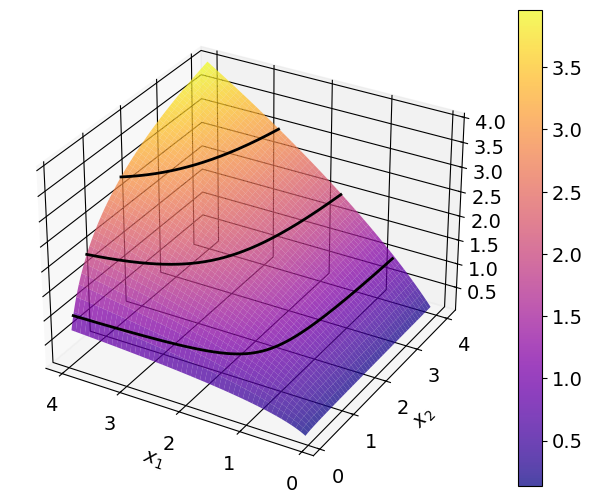

In [79]:
plot(x1_vec,x2_vec,alpha,beta,uvals)